# Logistic Regression

In this notebook, I will implement logistic regression from scratch without using scikit learn library. The same way I did for linear regression to see how the logistic regression algorithm really works.

I will use the data from the machine learning course taught by Andrew Ng at coursera. The data comes from the second assignment.

Let's start by importing the basic libraries needed in this exercice 

In [1]:
from pandas import read_csv
from matplotlib import pyplot
import numpy

In this exercise, I will build a logistic regression model to predict whether a student gets admitted into a university.

The goal is to determine each applicant’s chance of admission based on their results on two exams. we have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, we have the applicant’s scores on two exams and the admissions decision.

The objective is to build a classification model that estimates an applicant’s probability of admission based on the scores from those two exams. 

Let's start by loading the data and visualizing it

In [2]:
filename = 'ex2data1.csv'
names = ['Exam1','Exam2','Class']
Dataset = read_csv(filename, names = names)

Let's split the data into training features and labels

In [3]:
array = Dataset.values

X_ = array[:,:-1]
Exam_1 = array[:,0]
Exam_2 = array[:,1]
Y_ = array[:,-1]
Y = array[:,-1].reshape(len(Y_),1) # to reshape it as a column

Now that the data is split, we can visulize it get an Idea how it looks like

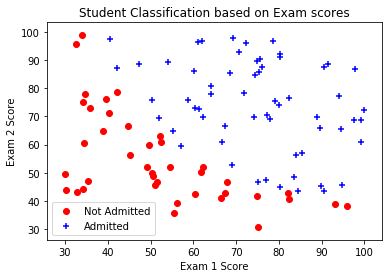

In [4]:
for i in range(len(Y)):
	if Y[i] == 0:
		y0 = pyplot.scatter(Exam_1[i],Exam_2[i], color = 'red', marker='o')
	else:
		y1 = pyplot.scatter(Exam_1[i],Exam_2[i], color = 'blue', marker='+')
pyplot.xlabel("Exam 1 Score")
pyplot.ylabel("Exam 2 Score")
pyplot.title("Student Classification based on Exam scores")
pyplot.legend((y0,y1),('Not Admitted','Admitted'))
pyplot.show()

## Introduction to the math behind logistic regression

Logistic regression is a classification algorithm. the goal is to seperate the data into classes and predict probabilities for each new example about which class it will most likely belong to.

The data is separated with a hyperplane which has the folowing equation:
                
$$\Theta^TX =0$$
                        
with Theta.T being the transpose to the column of weights and X is the training set matrix.

Let's suppose we have two classes 0 and 1, we predict the class a training example belongs to by pluging the training example's values into the hyperplane equation. If the outcome is positive, the predicted class is 1. Otherwise, the predicted class will be 0.

To convert the outputs of the equations into probabilities we can apply the sigmoid function which takes any value as an input and makes it between 0 and 1.

Let's define the sigmoid function:

In [5]:
def sigmoid(x):
	z = numpy.exp(-x)
	sigmoid = 1/(1+z)
	return sigmoid

## The cost function

In this section I will define the cost function of the logistic regression.

The cost function for a single training sample is:

$$l(y_i,a_i) = -y_i*log(a_i)-(1-y_i)log(1-a_i)$$
                
with $a$ being the estimated output and $y$ the true output.

To get an intuition why this is the right cost function to use, let's try some values:

for y = 0 and a = 0 we have the loss equal to 0 which makes sense as the prediction 'a' is true.
if y = 0 and a = 1 the value of the loss is infinity which also makes sense as the prediction is false and it's the opposite of what we expected.

The more general cost function for all training samples is:

$$L(y,a) = \frac{1}{m}*\sum_{i}-y_i*log(a_i)-(1-y_i)log(1-a_i)$$
                
               

Let's define the the cost function called also the Loss function:

In [6]:
def costFunction(X,Y,Theta):
	h = sigmoid(X.dot(Theta))
	m = len(Y)
	term1 = Y*numpy.log(h)
	term2 = (1-Y)*numpy.log(1-h)
	J = (-1/m)*numpy.sum(term1+term2)
	return J

## The Optimization Phase

The main goal of the algorithm is to minimize the loss function. the way to do that is to compute the derivative of loss function for the coefficient Theta.

Let's define the function that computes the gradients

In [7]:
def computeGradient(X,Y,Theta):
	h = sigmoid(X.dot(Theta))
	m = len(Y)
	term = (h-Y)*X
	grad = (1/m)*numpy.sum(term,axis=0)
	return grad.reshape(Theta.size,1)

The way to optimize is to update the coefficients in each iteration to reach the minimum of the loss function. we do that with the gradient descent.

Let's define the gradient descent function

In [8]:
def gradientDescent(X,Y,iterations,learning_rate,Theta):
	i = 0
	error = []
	while i<iterations:
		gradient = computeGradient(X,Y,Theta)
		Theta = Theta - learning_rate*gradient
		i += 1
	return Theta

Great, Now we have all the component we need to build the algorithm. One more thing we need to do is to add the column of ones to X to complete the equation of the hyperplane and make written in the form of:

$$(\Theta^T)*X =0$$

In [9]:
X = numpy.c_[numpy.ones(len(Y)),X_]

Let's initialize the coefficients and define the hyperparamters of the algorithm that we are going to need

In [10]:
Theta = numpy.zeros((3,1))
iterations = 700000
learning_rate = 0.001

Let's apply the algorithm and predict the class for the following example:

In [11]:
Theta = gradientDescent(X,Y,iterations,learning_rate,Theta)

x = numpy.array([1,45,85])
PredictedY = sigmoid(x.dot(Theta))

PredictedClass = numpy.round_(PredictedY)

print(PredictedY)
print(PredictedClass)

[0.66964665]
[1.]


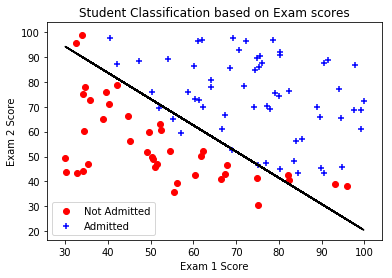

In [12]:
for i in range(len(Y)):
	if Y[i] == 0:
		y0 = pyplot.scatter(Exam_1[i],Exam_2[i], color = 'red', marker='o')
	else:
		y1 = pyplot.scatter(Exam_1[i],Exam_2[i], color = 'blue', marker='+')
pyplot.xlabel("Exam 1 Score")
pyplot.ylabel("Exam 2 Score")
pyplot.title("Student Classification based on Exam scores")
pyplot.legend((y0,y1),('Not Admitted','Admitted'))

Y1 = -(Theta[0]+(Theta[1]*Exam_1))
Y1 = Y1/Theta[2]

pyplot.plot(Exam_1,Y1,color = 'black')

pyplot.show()

## Using SKlearn

Just for the sake of comparision let's solve this using scikit learn library

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_,Y_,test_size = 0.2,random_state = 7)

LogReg = LogisticRegression(random_state=7, solver='lbfgs')
LogReg.fit(X_train,Y_train)

x = numpy.array([45,85]).reshape(1,-1)

print(LogReg.predict(x))

[1.]
